<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°031



## Problema 01


<img src="https://cdn-icons-png.flaticon.com/512/11651/11651343.png" width="480" height="360" align="center"/>


El conjunto de datos `occupation.csv` consiste en información detallada sobre distintos usuarios, abarcando aspectos como edad, género, profesión y ubicación geográfica. Este conjunto de datos proporciona una visión rica sobre la diversidad de ocupaciones y demografía de una población específica.


**Descripción de las Columnas**

El DataFrame contiene las siguientes columnas, cada una representando un aspecto clave de la información del usuario:

- **`user_id`**: Un identificador único para cada usuario.
- **`age`**: La edad del usuario.
- **`gender`**: El género del usuario, indicado como 'M' (masculino) o 'F' (femenino).
- **`occupation`**: La profesión u ocupación del usuario.
- **`zip_code`**: El código postal del área de residencia del usuario, que puede ser útil para análisis geográficos.

Este conjunto de datos permite realizar una variedad de análisis estadísticos y descriptivos, desde demográficos básicos hasta exploraciones más complejas de las relaciones entre ocupación, edad y ubicación.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
url='https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/ocupation.csv'

df_old = pd.read_csv(url, sep="|" )
df = df_old.drop_duplicates()
df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

### Descripción General
- **Total de Observaciones**: ¿Cuántas filas tiene el conjunto de datos?
- **Total de Columnas**: ¿Cuántas columnas tiene el conjunto de datos?
- **Nombres de Columnas**: Listar todos los nombres de las columnas.
- **Índice del DataFrame**: Describir cómo está indexado el DataFrame.
- **Tipos de Datos**: Detallar los tipos de datos de cada columna.


In [32]:
#Total de observaciones
df.shape

(943, 5)

In [33]:
#nombres de las columnas
df.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [34]:
#indice del dataframe
df.index

RangeIndex(start=0, stop=943, step=1)

In [35]:
# tipo de datos
df.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

Conclusiones: Tenemos un data frame de 5 columnas con 943 filas. Las columnas esta etiquetadas por nombre de usuario, edad, genero, ocupacion y codigo postal. Los indices estan ordenados desde el 0 al 943 de uno en uno.


### Estadísticas Descriptivas
- **Resumen Estadístico**: Utilizar .describe() para obtener un resumen estadístico de las columnas pertinentes.
- **Columna de Ocupación**: Visualizar los datos de la columna occupation.


In [36]:
# resumen estadistico
df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [37]:
# columna de ocupacion
df['occupation'].head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

Conclusiones: La edad promedio de los usuarios es de 34 años. El mas joven de ellos tiene 7 años y el mas viejo tiene 73 años.


### Análisis de Ocupaciones
- **Cantidad de Ocupaciones Únicas**: ¿Cuántas ocupaciones diferentes existen en el conjunto de datos?
- **Ocupación Más Frecuente**: ¿Cuál es la ocupación que aparece con mayor frecuencia?
- **Distribución de Ocupaciones**: Mostrar la distribución de las 10 ocupaciones más comunes con un gráfico de barras.


In [38]:
# cantidad de ocupaciones unicas
df['occupation'].nunique()

21

In [39]:
# ocupacion mas frecuente
df['occupation'].value_counts()

occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64

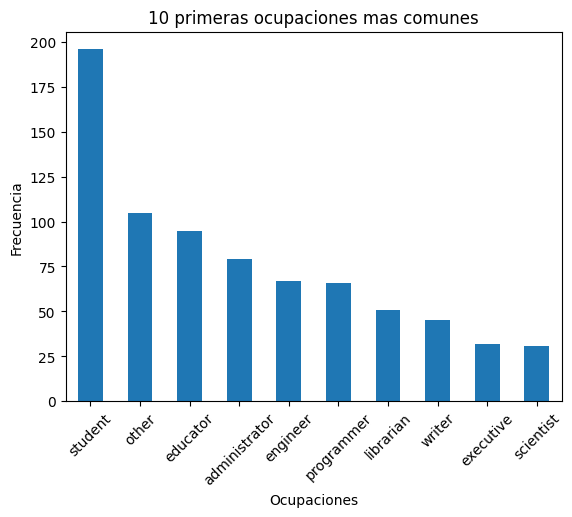

In [40]:
# distribucion de ocupaciones

top10=df['occupation'].value_counts().nlargest(10)
top10.plot(kind='bar')
plt.title('10 primeras ocupaciones mas comunes')
plt.xlabel('Ocupaciones')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


Conclusiones: De las 943 usuarios sabemos que hay 21 ocupaciones distintas. Las mas comunes son estudiante, otros, educador, administrador e ingeniero, entro otras como se muestra en el grafico. Desde ya podemos inferenciar que la mayoria de usuarios son estudiantes, posiblemente no mayores de los 25 años


### Análisis Demográfico
- **Edad Media de los Usuarios**: Calcular la edad promedio.
- **Edad con Menos Ocurrencia**: Identificar las edades menos comunes.
- **Distribución de la Edad de los Usuarios**: Identificar la distribución de edades.
- **Proporción de Géneros**: Calcular la proporción de usuarios por género.


In [41]:
# Edad media de los usuarios
df['age'].mean()

34.05196182396607

In [42]:
# edad con menos ocurrencia
df['age'].value_counts().tail()

age
7     1
66    1
11    1
10    1
73    1
Name: count, dtype: int64

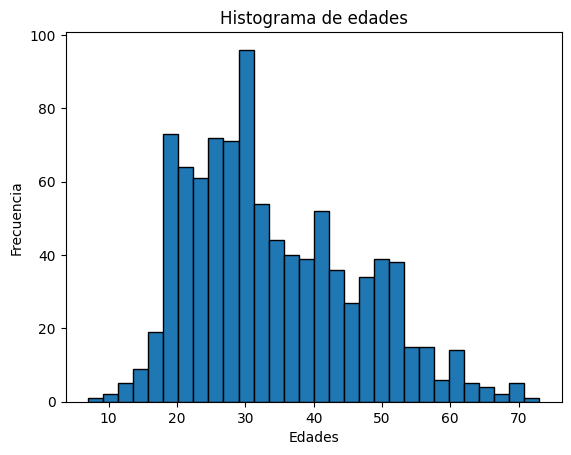

In [43]:
df['age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Histograma de edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.show()

In [59]:
#proporcion de genero
round(100*df['gender'].value_counts()/len(df),2)

gender
M    71.05
F    28.95
Name: count, dtype: float64

Conclusiones: El promedio de edad de los usuarios es de 34 años aproximadamente. Donde las edades menos ocurrentes estan entre los 7-10 años y 65-73 años. Segun el histograma se puede inferior que la distribucion de la edad es una normal con promedio 34. Por ultimo, la gran mayoria de usuarios son hombres con un 71%.